April 2024

Assignment 1 Reinforcemenr Learning and Dynamic Optimization


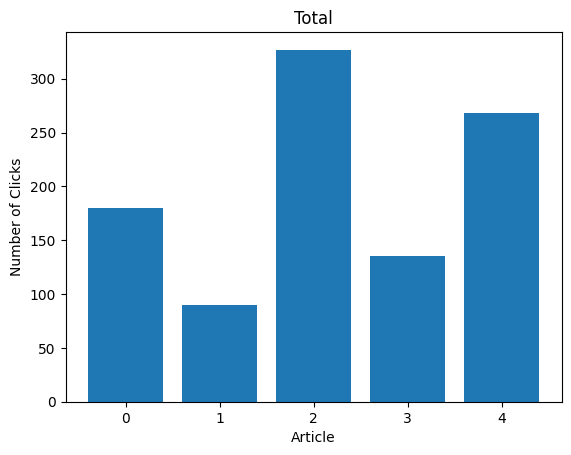

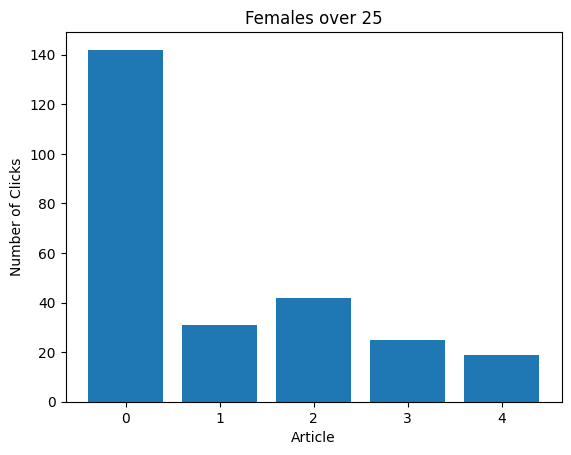

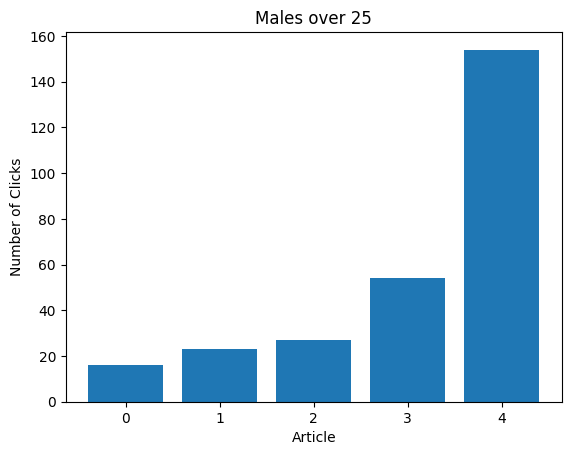

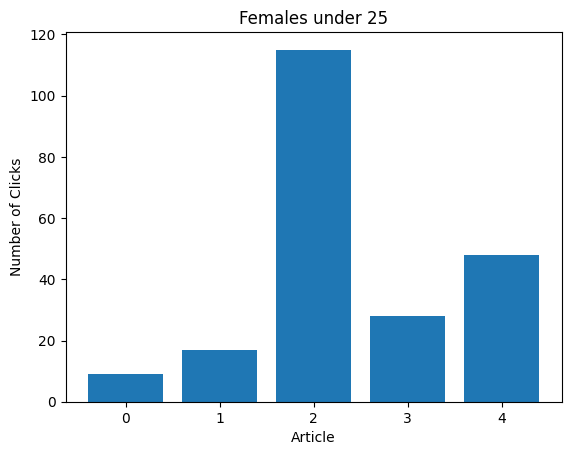

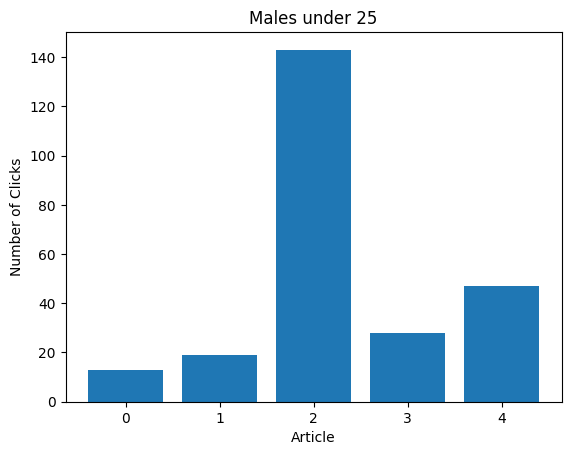

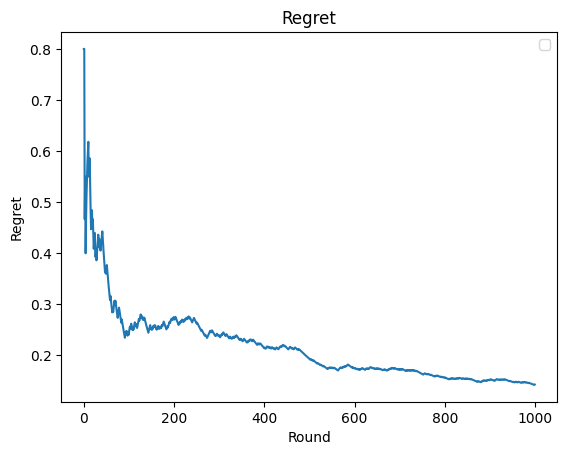

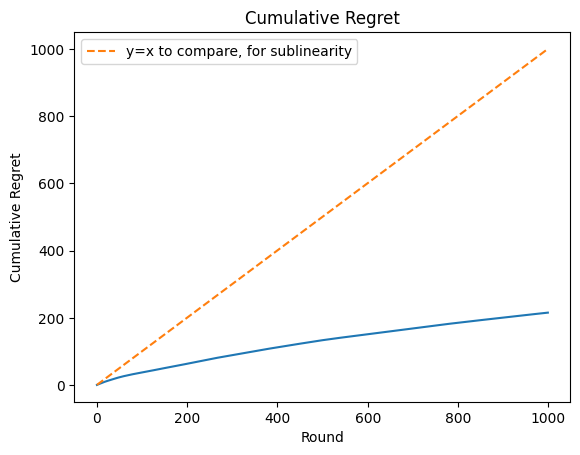

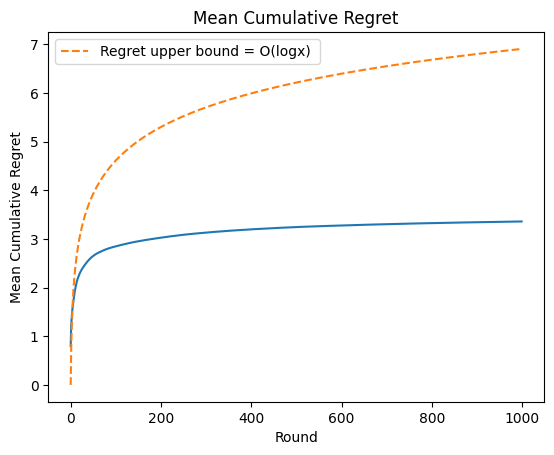

In [32]:
"""
  :param t: In the provided code, the variable `t` is used as a loop iterator representing the current
  round or time step in the simulation of our multi-armed bandit problem. It is used to iterate over the
  total number of rounds `T` for which the bandit algorithm is run

  :param k: The parameter `k` represents the number of arms in the multi-armed bandit problem. In this
  context, it refers to the number of different articles that can be selected by the algorithm.
  In your code, `k = 5`, which means there are 5 arms or options

  :param user_type: The `user_type` in the provided code refers to the different types of users
  interacting with the system. In this case, there are four user types represented by integers 0, 1,
  2, and 3. Each user type has a specific click probability associated with each of the available

  The code is a simulation of a multi-armed bandit problem using the UpperConfidence Bound (UCB) algorithm with multiple user types.
  The code simulates the selection of arms based on UCB values for different user types and updates the mean rewards for each arm accordingly.
  It also calculates and plots various metrics such as regret and cumulative regret.
"""

#importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import math


#parameters and variables
k = 5       #number of arms
T=1000      #horizon
U = 4       #number of users

#click probabilities for the different user types
p = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],  # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],  # male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],  # female under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]   # male under 25
])
optimal = np.max(p, axis=1) #best arm for simulation... i.e. best article for female over 25 is no.1 (p0=0.8)

pulls = np.zeros((k,U)) #array that holds the num of pulls for each hand (article)
mean_reward_i = np.zeros((k,U)) #mean reward for arm i (k arms in total.)
round_t_cumreward = np.zeros((T)) #cumulative reward for round t
regret = np.zeros((T,)) #regret for round t
cum_regret = np.zeros((T,)) #cumulative regret for round t
mean_cum_regret = np.zeros((T,)) #mean cumulative regret for round t
ucb = np.zeros((k,U)) #upper confidence bound for each user type and arm
best_arm_cumreward = np.zeros((T,)) #cumulative reward of best arm for round t
ucb_sqrt = np.zeros((k,U))
max_ucb = np.zeros((U,))
best_arms = [] #array to store all best arms for any user type
u0, u1, u2, u3 = [], [], [], [] #array to store  best arms for each user type respectively

#axis for plotting...
x = np.linspace(0, T, T)


# function to choose the best arm  based on max UCB
def choose_best_arm(t,k,user_type):
    # Calculate the total number of pulls for the specified user_type
    total_pulls = sum(pulls[:,user_type])

    # Calculate UCB values for each arm
    for arm in range(k):
        # If arm hasn't been pulled yet, select it
        if pulls[arm][user_type] == 0:
            return arm
        # Calculate ucb value
        ucb_sqrt[arm][user_type] = np.sqrt((2 * np.log(total_pulls)) / float(pulls[arm][user_type]))
        ucb[arm][user_type] = mean_reward_i[arm][user_type] + ucb_sqrt[arm][user_type]
    # Choose the arm with the highest UCB value for the specified user_type
    max_ucb[user_type] = ucb[:, user_type].max()
    best_arm = ucb[:, user_type].argmax()
    return best_arm


# function to update the mean reward of the chosen arm
def update(chosen_arm, reward, user_type):
    # Increment the number of pulls for the chosen arm and user_type
    pulls[chosen_arm][user_type] += 1
    n_1 = pulls[chosen_arm][user_type]

    # Retrieve the current mean reward for the chosen arm and user_type
    mu_1 = mean_reward_i[chosen_arm][user_type]

    # Update the mean reward for the chosen arm and user_type based on the new reward
    new_mean_reward_i = ((n_1 - 1) / float(n_1)) * mu_1 + (1 / float(n_1)) * reward

    # Store the updated mean reward for the chosen arm and user_type
    mean_reward_i[chosen_arm][user_type] = new_mean_reward_i
    return


#simulation part for T rounds total
for t in range(T):
  #choose a user type randomly
  u = random.randint(0,U-1)
  #choose the best arm
  Best = choose_best_arm(t,k,u)
  #generate a random reward for that best arm
  reward = np.random.binomial(1, p[u][Best])
  #update the mean reward for that arm
  update(Best, reward, u)
  #save the best arm on an array
  best_arms.append(Best)
  #save best arm for every user..
  if u == 0:
    u0.append(Best)
  elif u == 1:
    u1.append(Best)
  elif u == 2:
    u2.append(Best)
  elif u == 3:
    u3.append(Best)

  #calculating best_arm_cumreward[t] and round_t_cumreward[t]
  if t > 0:
    round_t_cumreward[t] = round_t_cumreward[t-1] + reward
    best_arm_cumreward[t] = best_arm_cumreward[t-1] + optimal[u]
  else:
    round_t_cumreward[t] = reward
    best_arm_cumreward[t] = optimal[u]

  #calculate regret at round t
  regret[t] = (best_arm_cumreward[t] - round_t_cumreward[t])/(t+1)

  #calculate cumulative regret and mean cumulative regret (at round t)
  if t > 0:
    cum_regret[t] = cum_regret[t-1] + regret[t]
    mean_cum_regret[t] = mean_cum_regret[t-1] + regret[t]/(t+1)
  else:
    cum_regret[t] = regret[t]
    mean_cum_regret[t] = regret[t]/(t+1)


#plotting the results

# histograms of article selections
plt.title(f"Total")
plt.hist(best_arms, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Females over 25")
plt.hist(u0, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Males over 25")
plt.hist(u1, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Females under 25")
plt.hist(u2, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Males under 25")
plt.hist(u3, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

# Plot regret
plt.plot(regret,label='_')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret')
plt.legend()
plt.show()

x = np.linspace(1, T, T)
y1= x

# plot cumulative regret and the  UCB
plt.plot(cum_regret,label='_')
plt.plot(y1, label='y=x to compare, for sublinearity' ,linestyle='--')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret')
plt.legend()
plt.show()

y1 = np.log(x)

# plot mean cumulative regret and the  UCB
plt.plot(mean_cum_regret,label='_')
plt.plot(y1, label='Regret upper bound = O(logx) ' ,linestyle='--')
plt.xlabel('Round')
plt.ylabel('Mean Cumulative Regret')
plt.title('Mean Cumulative Regret')
plt.legend()
plt.show()





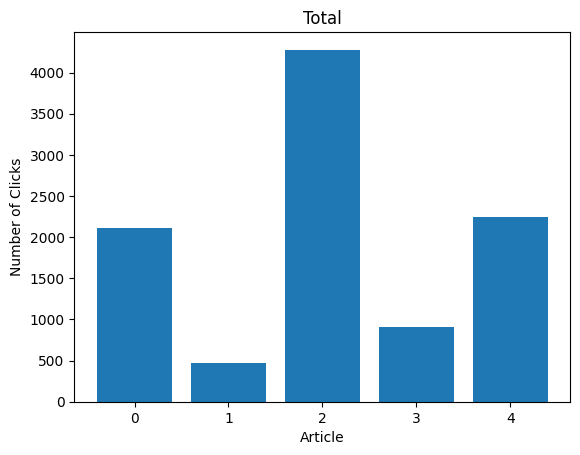

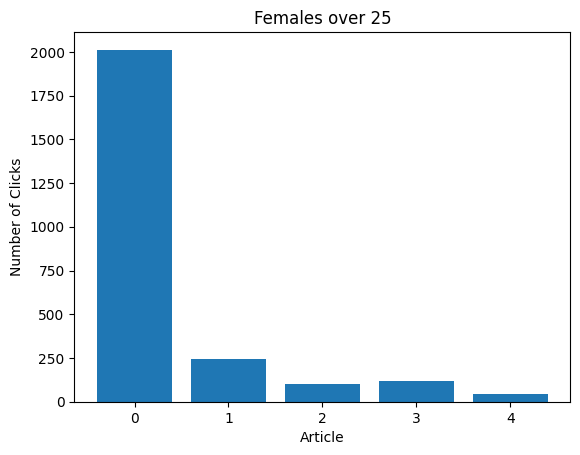

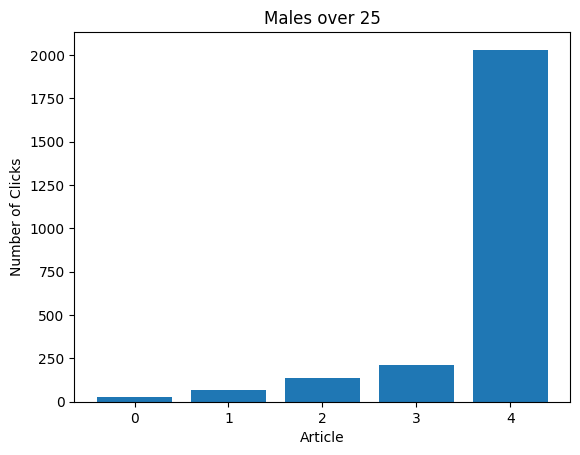

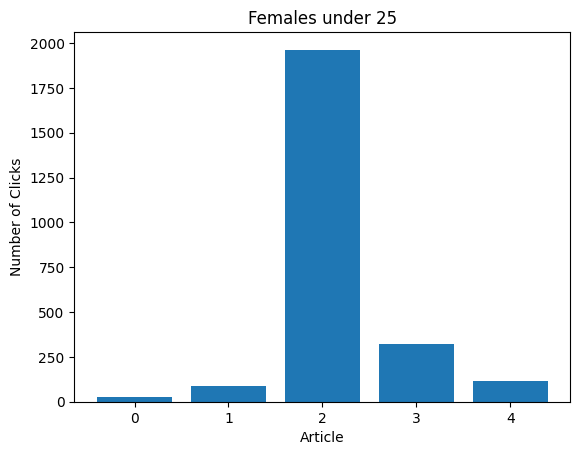

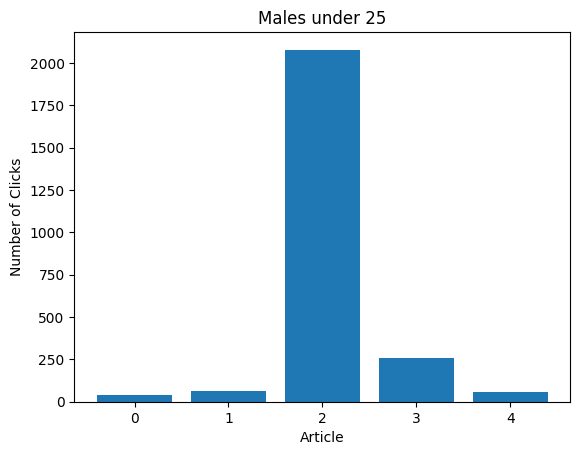

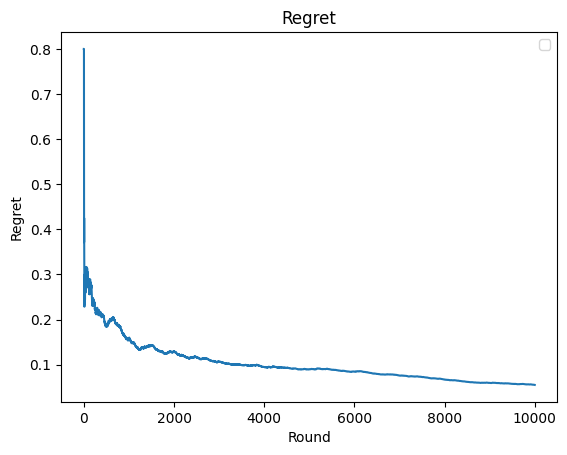

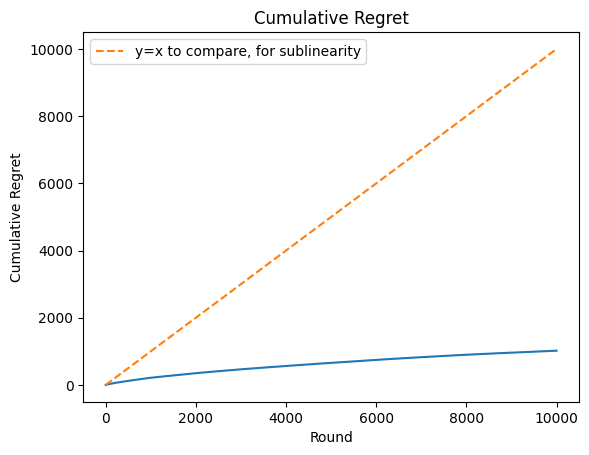

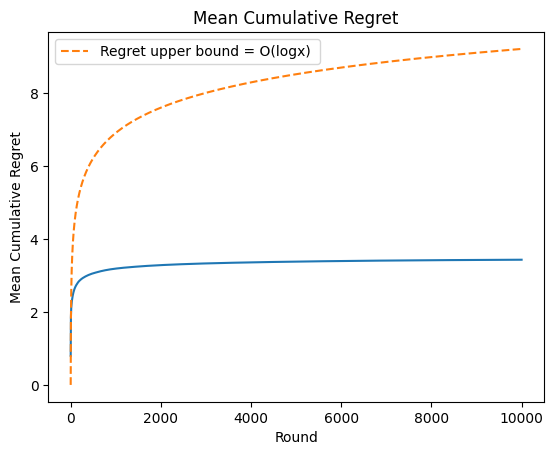

In [33]:
# the same for T=10.000

#importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import math


#parameters and variables
k = 5       #number of arms
T = 10000      #horizon
U = 4       #number of users

#click probabilities for the different user types
p = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],  # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],  # male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],  # female under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]   # male under 25
])
optimal = np.max(p, axis=1) #best arm for simulation... i.e. best article for female over 25 is no.1 (p0=0.8)

pulls = np.zeros((k,U)) #array that holds the num of pulls for each hand (article)
mean_reward_i = np.zeros((k,U)) #mean reward for arm i (k arms in total.)
round_t_cumreward = np.zeros((T)) #cumulative reward for round t
regret = np.zeros((T,)) #regret for round t
cum_regret = np.zeros((T,)) #cumulative regret for round t
mean_cum_regret = np.zeros((T,)) #mean cumulative regret for round t
ucb = np.zeros((k,U)) #upper confidence bound for each user type and arm
best_arm_cumreward = np.zeros((T,)) #cumulative reward of best arm for round t
ucb_sqrt = np.zeros((k,U))
max_ucb = np.zeros((U,))
best_arms = [] #array to store all best arms for any user type
u0, u1, u2, u3 = [], [], [], [] #array to store  best arms for each user type respectively

#axis for plotting...
x = np.linspace(0, T, T)


# function to choose the best arm  based on max UCB
def choose_best_arm(t,k,user_type):
    # Calculate the total number of pulls for the specified user_type
    total_pulls = sum(pulls[:,user_type])

    # Calculate UCB values for each arm
    for arm in range(k):
        # If arm hasn't been pulled yet, select it
        if pulls[arm][user_type] == 0:
            return arm
        # Calculate ucb value
        ucb_sqrt[arm][user_type] = np.sqrt((2 * np.log(total_pulls)) / float(pulls[arm][user_type]))
        ucb[arm][user_type] = mean_reward_i[arm][user_type] + ucb_sqrt[arm][user_type]
    # Choose the arm with the highest UCB value for the specified user_type
    max_ucb[user_type] = ucb[:, user_type].max()
    best_arm = ucb[:, user_type].argmax()
    return best_arm


# function to update the mean reward of the chosen arm
def update(chosen_arm, reward, user_type):
    # Increment the number of pulls for the chosen arm and user_type
    pulls[chosen_arm][user_type] += 1
    n_1 = pulls[chosen_arm][user_type]

    # Retrieve the current mean reward for the chosen arm and user_type
    mu_1 = mean_reward_i[chosen_arm][user_type]

    # Update the mean reward for the chosen arm and user_type based on the new reward
    new_mean_reward_i = ((n_1 - 1) / float(n_1)) * mu_1 + (1 / float(n_1)) * reward

    # Store the updated mean reward for the chosen arm and user_type
    mean_reward_i[chosen_arm][user_type] = new_mean_reward_i
    return


#simulation part for T rounds total
for t in range(T):
  #choose a user type randomly
  u = random.randint(0,U-1)
  #choose the best arm
  Best = choose_best_arm(t,k,u)
  #generate a random reward for that best arm
  reward = np.random.binomial(1, p[u][Best])
  #update the mean reward for that arm
  update(Best, reward, u)
  #save the best arm on an array
  best_arms.append(Best)
  #save best arm for every user..
  if u == 0:
    u0.append(Best)
  elif u == 1:
    u1.append(Best)
  elif u == 2:
    u2.append(Best)
  elif u == 3:
    u3.append(Best)

  #calculating best_arm_cumreward[t] and round_t_cumreward[t]
  if t > 0:
    round_t_cumreward[t] = round_t_cumreward[t-1] + reward
    best_arm_cumreward[t] = best_arm_cumreward[t-1] + optimal[u]
  else:
    round_t_cumreward[t] = reward
    best_arm_cumreward[t] = optimal[u]

  #calculate regret at round t
  regret[t] = (best_arm_cumreward[t] - round_t_cumreward[t])/(t+1)

  #calculate cumulative regret and mean cumulative regret (at round t)
  if t > 0:
    cum_regret[t] = cum_regret[t-1] + regret[t]
    mean_cum_regret[t] = mean_cum_regret[t-1] + regret[t]/(t+1)
  else:
    cum_regret[t] = regret[t]
    mean_cum_regret[t] = regret[t]/(t+1)


#plotting the results

# histograms of article selections
plt.title(f"Total")
plt.hist(best_arms, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Females over 25")
plt.hist(u0, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Males over 25")
plt.hist(u1, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Females under 25")
plt.hist(u2, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

plt.title("Males under 25")
plt.hist(u3, bins=np.arange(k+1)-0.5, rwidth=0.8)
plt.xlabel('Article')
plt.ylabel('Number of Clicks')
plt.show()

# Plot regret
plt.plot(regret,label='_')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.title('Regret')
plt.legend()
plt.show()

x = np.linspace(1, T, T)
y1= x

# plot cumulative regret and the  UCB
plt.plot(cum_regret,label='_')
plt.plot(y1, label='y=x to compare, for sublinearity' ,linestyle='--')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret')
plt.legend()
plt.show()

y1 = np.log(x)

# plot mean cumulative regret and the  UCB
plt.plot(mean_cum_regret,label='_')
plt.plot(y1, label='Regret upper bound = O(logx) ' ,linestyle='--')
plt.xlabel('Round')
plt.ylabel('Mean Cumulative Regret')
plt.title('Mean Cumulative Regret')
plt.legend()
plt.show()

